In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [5]:
covid_df.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
296582,SSD,Africa,South Sudan,2020-01-24,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,57.85,0.433,10913172.0,NaN,NaN,NaN,NaN
202170,MDA,Europe,Moldova,2023-09-01,621238.0,0.0,24.714,12125.0,0.0,0.000,...,44.6,86.979,5.800,71.90,0.750,3272993.0,NaN,NaN,NaN,NaN
280317,SRB,Europe,Serbia,2021-07-13,717667.0,118.0,97.714,7073.0,1.0,2.000,...,40.2,97.719,5.609,76.00,0.806,6871547.0,NaN,NaN,NaN,NaN
102842,FLK,South America,Falkland Islands,2021-12-21,81.0,0.0,0.143,NaN,0.0,0.000,...,NaN,NaN,NaN,81.44,NaN,3801.0,NaN,NaN,NaN,NaN
76566,CYP,Europe,Cyprus,2022-08-22,574124.0,0.0,304.286,1152.0,0.0,0.429,...,52.7,NaN,3.400,80.98,0.887,896007.0,NaN,NaN,NaN,NaN
287037,SVK,Europe,Slovakia,2020-10-06,13812.0,320.0,605.429,55.0,0.0,1.429,...,37.7,NaN,5.820,77.54,0.860,5643455.0,NaN,NaN,NaN,NaN
119035,GRC,Europe,Greece,2020-04-23,2273.0,0.0,16.857,113.0,0.0,2.000,...,52.0,NaN,4.210,82.24,0.888,10384972.0,NaN,NaN,NaN,NaN
242220,PAN,North America,Panama,2020-06-16,20686.0,627.0,608.714,437.0,8.0,6.286,...,9.9,NaN,2.300,78.51,0.815,4408582.0,NaN,NaN,NaN,NaN
215462,NPL,Asia,Nepal,2021-09-23,788769.0,941.0,968.571,11072.0,13.0,10.000,...,37.8,47.782,0.300,70.78,0.602,30547586.0,NaN,NaN,NaN,NaN
193238,MTQ,North America,Martinique,2022-03-20,138039.0,0.0,952.714,909.0,0.0,0.714,...,NaN,NaN,NaN,82.54,NaN,367512.0,1104.6,13.58,8.72,3005.616


In [3]:
covid_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.157480e+05,3.441510e+05,3.428920e+05,2.940710e+05,344196.000000,342966.000000,315748.000000,344151.000000,342892.000000,294071.000000,...,203022.000000,134406.000000,242222.000000,325475.000000,265931.000000,3.537300e+05,1.220600e+04,12206.000000,12206.000000,12206.000000
mean,6.761223e+06,9.502167e+03,9.536932e+03,8.646522e+04,84.639145,84.939144,102920.176192,143.707988,144.231797,877.476206,...,32.909757,50.789665,3.097080,73.711918,0.722431,1.283056e+08,5.304842e+04,9.756453,11.338801,1674.436452
std,4.106667e+07,1.096879e+05,9.397265e+04,4.417802e+05,610.470247,556.187355,152273.374316,1157.607234,596.901943,1103.757693,...,13.574386,31.956856,2.548368,7.395129,0.148969,6.602285e+08,1.492694e+05,12.294364,25.170342,1940.631800
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,8.225750e+03,0.000000e+00,2.860000e-01,1.280000e+02,0.000000,0.000000,2640.600000,0.000000,0.034000,61.371000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.212250e+02,1.422500,-1.590000,73.608505
50%,7.101800e+04,1.000000e+00,2.400000e+01,1.337000e+03,0.000000,0.143000,28934.498500,0.095000,6.248000,381.906000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.953449e+03,8.100000,5.715000,1114.034500
75%,7.571442e+05,2.540000e+02,4.868570e+02,1.195200e+04,3.000000,5.000000,134930.244000,34.352500,80.684000,1372.229000,...,41.300000,83.056250,4.200000,79.460000,0.829000,2.830170e+07,3.769618e+04,15.377500,16.300000,2746.470600
max,7.716789e+08,8.401960e+06,6.402036e+06,6.977010e+06,27939.000000,14822.000000,737554.506000,228872.025000,37241.781000,6511.885000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.620000,377.630000,10292.916000


What kind of information could be used for data analysis:
1. Line chart: how new cases and total cases increases over time.
2. Varied death rate across continent/countries. (total_deaths_per_million in a specific date)
3. Cases -> hosp_patients -> icu_patients -> death. 
4. Number of vaccinations/boosters vs new cases.
5. People_fully_vaccinated_per_hundred across different countries.

hypothesis:
1. Countries that have a better public health enviroment(handwashing_facilities, hospital_beds_per_thousand) could decrease the death/icu rate.
2. Rich countries(life_expectancy) have a higher vaccination rate.
3. What's the most relevant features concerning excess_mortality.

Univariate Exploration

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353730 entries, 0 to 353729
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    353730 non-null  object 
 1   continent                                   336914 non-null  object 
 2   location                                    353730 non-null  object 
 3   date                                        353730 non-null  object 
 4   total_cases                                 315748 non-null  float64
 5   new_cases                                   344151 non-null  float64
 6   new_cases_smoothed                          342892 non-null  float64
 7   total_deaths                                294071 non-null  float64
 8   new_deaths                                  344196 non-null  float64
 9   new_deaths_smoothed                         342966 non-null  float64
 

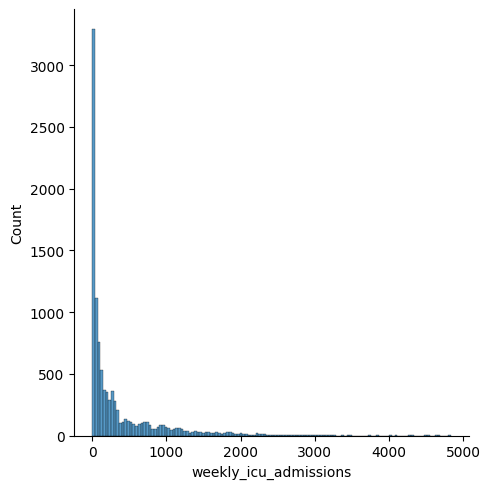

In [10]:
base_color = sb.color_palette()[0]

sb.displot(covid_df['weekly_icu_admissions_per_million'],color=base_color)
